In [34]:
import numpy as np
import pandas as pd  
from sklearn.model_selection import cross_val_score ,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import matplotlib.pyplot as plt 



In [35]:
import pandas as pd 
df=pd.read_csv(r"C:\Users\nilay\Documents\GitHub\Turkcell_ML_Projects-\Hitters.csv")

In [36]:
df.dropna()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [37]:
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
dms.columns

Index(['League_A', 'League_N', 'Division_E', 'Division_W', 'NewLeague_A',
       'NewLeague_N'],
      dtype='object')

In [38]:
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X_.columns
X=pd.concat([X_,dms[['League_A', 'League_N', 'Division_E', 'Division_W', 'NewLeague_A',
       'NewLeague_N']]],axis=1)
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,...,14.0,446.0,33.0,20.0,True,False,True,False,True,False
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,...,375.0,632.0,43.0,10.0,False,True,False,True,False,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,...,263.0,880.0,82.0,14.0,True,False,False,True,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,...,354.0,200.0,11.0,3.0,False,True,True,False,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,...,33.0,805.0,40.0,4.0,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,...,138.0,325.0,9.0,3.0,False,True,True,False,False,True
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,...,875.0,313.0,381.0,20.0,True,False,True,False,True,False
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,...,146.0,37.0,113.0,7.0,True,False,False,True,True,False
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,...,332.0,1314.0,131.0,12.0,True,False,True,False,True,False


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [44]:
import numpy as np

print(np.isnan(y_train).sum())  # Count NaN values in y_train
# Remove rows with NaN values in y_train
mask = ~np.isnan(y_train)  # Create a mask for non-NaN values
X_train = X_train[mask]  # Keep only valid rows
y_train = y_train[mask]  # Keep only valid rows


0


In [48]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train)
ridge_model.coef_



array([ -1.9771764 ,   6.36947594,   4.84239069,  -1.71049601,
        -1.00217646,   6.43169658,  -6.24486356,  -0.19980845,
         0.70996069,   0.92061769,   0.81249742,   0.58965922,
        -1.13294355,   0.29561081,   0.41706244,  -4.51628756,
       -34.09731457,  34.09731457,  63.98385782, -63.98385782,
        22.88999867, -22.88999867])

In [49]:
ridge_model.intercept_

176.91475127404033

# alpha değiştikçe coefficients değişir 

In [50]:
lambdalar=10**np.linspace(10,-2,100)*0.5
ridge_model=Ridge()
katsayilar=[]

for i in lambdalar:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(X_train,y_train)
  katsayilar.append(ridge_model.coef_)

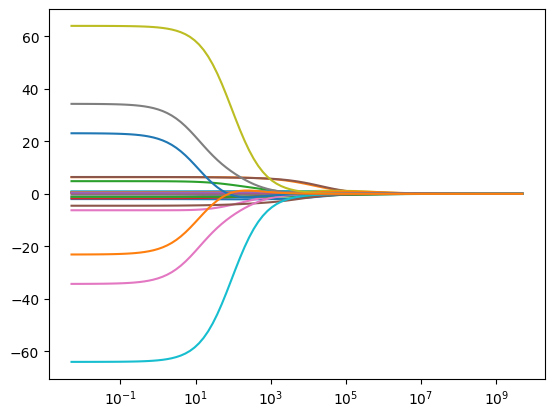

In [ ]:
ax=plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")
#farklı lambda değerlerine karşı katsayıların değişimi = 0 a yaklaştırır. 

In [54]:
y_train[0:10]

168     110.0
148     850.0
221     210.0
227     200.0
139     100.0
59     1350.0
163    2412.5
6        70.0
198     145.0
274     200.0
Name: Salary, dtype: float64

In [ ]:
y_pred= ridge_model.predict(X_train)
y_pred[0:10]

array([  47.93969247,  627.10096719,  505.67804276,  381.14562182,
        179.92854496, 1108.38980706, 1939.19287857,  282.58942494,
        328.09617683,  777.15589018])

In [56]:
rmse=np.sqrt(mean_squared_error(y_train,y_pred))
mse=mean_squared_error(y_train,y_pred)
msa=mean_absolute_error(y_train,y_pred)

print(rmse)
print(mse)
print(msa)

292.4514682575038
85527.86128596976
210.76115161460342


In [ ]:
#k-katlı cross validasyon 
from sklearn.model_selection import cross_val_score

cv= cross_val_score(ridge_model,X_train,y_train,cv=10,scoring="r2")
print(cv)
mean=np.mean(cv)
print(mean)
np.mean(-cv)

[ 0.75012297  0.71479351  0.45943101 -0.51283882  0.28905088  0.50500519
  0.02048762 -0.03536509  0.70671065 -0.21129895]
0.2686098978414206


NameError: name 't' is not defined